<a href="https://colab.research.google.com/github/ridersw/Complete-Machine-Learning/blob/main/Deep_Learning_Sequential_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
%tensorflow_version 2.x

import tensorflow as tf   
from tensorflow import keras


import numpy as np
import matplotlib.pyplot as plt

In [49]:
fashion_mnist = keras.datasets.fashion_mnist #loading dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split the data into training and testings

In [33]:
train_images.shape

(60000, 28, 28)

In [34]:
train_images[0,23,23] #look at one pixel, image 0th, 23rd row and 23rd column

194

The output we got above is the pixel value between 0 to 255, 0 being black and 255 being white. Since this is a grey scale image. 

In [35]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

The labels are integers ranging between 0-9. Each integer represents a specific article of clothing. We will be creating an array of label names to indicate which is which.

In [50]:
class_names = ['T-shirt/ Top', 'Trousers','Pullover','Dress','Coat','Sandel','Shirt','Sneaker','Bag','Ankle Boot']

Below are some of the images

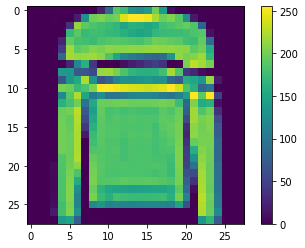

In [37]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

Data Preprocessing- Always preprocess the data and get the values between either 0 to 1 or -1 to 1.

In [51]:
train_images = train_images / 255.0
test_images = test_images / 255.0



In [52]:
#model- dfined the architecture of our neural network: defined amount of neurons in each layer, activation layer, type of layer and type of connection

model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)), #input layer
                          keras.layers.Dense(128, activation='relu'), #hidden layer
                          keras.layers.Dense(10, activation='softmax')]) #output layer. Here the output neuron are specified as 10 bcoz we have 10 different outputs


In [53]:
#compiling the model- Pick optimizer, loss and metric we are interested in 

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
model.fit(train_images, train_labels, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1838 - accuracy: 0.9307
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1780 - accuracy: 0.9325
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1757 - accuracy: 0.9331


In [59]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.3611 - accuracy: 0.8884
Test Accuracy: 0.8884000182151794


In [60]:
predictions = model.predict(test_images)

Pullover


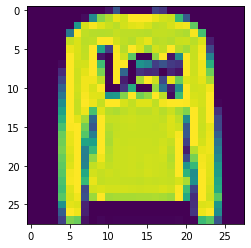

In [62]:
print(class_names[np.argmax(predictions[1])])
plt.imshow(test_images[1])